In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	1
float64		column 3	3
float64		column 4	2
float64		column 5	2
float64		column 6	3
float64		column 7	0
float64		column 8	5
float64		column 9	4
float64		column 10	5
float64		column 11	5
float64		column 12	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,400.000000,399.000000,397.000000,398.000000,398.000000,397.000000,400.000000,395.000000,396.000000,395.000000,395.000000,394.000000
mean,-0.100319,0.070645,2.043363,1.893535,1.941878,1.973403,2.025487,1.979285,1.965022,2.029482,1.979037,1.963774
std,2.564450,2.765875,1.129748,1.143808,1.162811,1.144773,1.160037,1.140989,1.150244,1.159507,1.151770,1.191712
min,-7.771000,-6.828400,0.005583,0.005376,0.000530,0.018503,0.003618,0.007321,0.007019,0.067105,0.006786,0.001972
25%,-0.694850,-0.820860,1.125300,0.939107,0.882807,0.993930,0.982585,1.024100,0.995082,1.031300,0.939205,0.912077
50%,-0.068013,0.021200,2.093200,1.777500,1.933800,2.020800,2.098100,1.951100,2.074650,2.087700,1.941700,1.925400
75%,0.763967,0.897005,2.987100,2.803325,2.982000,2.966200,2.972550,3.033200,2.927250,3.044600,2.970100,3.005175
max,8.409300,6.777100,3.976400,3.993400,3.979000,3.992300,3.996300,3.995000,3.985500,3.984300,3.967600,3.996000


<AxesSubplot:>

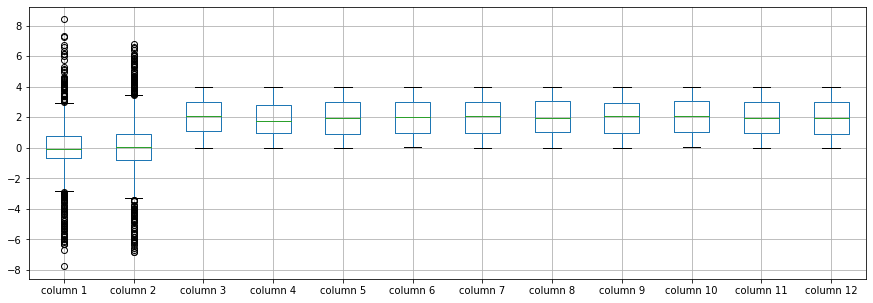

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.100319
column 2     0.070645
column 3     2.043363
column 4     1.893535
column 5     1.941878
column 6     1.973403
column 7     2.025487
column 8     1.979285
column 9     1.965022
column 10    2.029482
column 11    1.979037
column 12    1.963774
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.017493,-0.040902,-0.076389,0.015861,-0.005223,-0.016513,0.023216,-0.017236,0.050080,0.090141,-0.000666
column 2,0.017493,1.000000,-0.049426,0.031995,-0.078528,-0.093699,0.013653,-0.022393,-0.022945,0.022076,-0.030183,0.056257
column 3,-0.040902,-0.049426,1.000000,0.014000,-0.027966,-0.074092,-0.083712,0.081520,0.118793,-0.026892,-0.101018,-0.024352
column 4,-0.076389,0.031995,0.014000,1.000000,-0.018358,0.095494,0.004754,0.090466,0.001142,0.071883,-0.035296,-0.056120
column 5,0.015861,-0.078528,-0.027966,-0.018358,1.000000,0.072997,0.026870,-0.008021,-0.002819,0.022588,0.010691,-0.039984
column 6,-0.005223,-0.093699,-0.074092,0.095494,0.072997,1.000000,0.002664,0.068055,0.006728,-0.011774,0.030922,-0.044766
column 7,-0.016513,0.013653,-0.083712,0.004754,0.026870,0.002664,1.000000,-0.033900,0.083249,0.043708,0.004495,-0.057066
column 8,0.023216,-0.022393,0.081520,0.090466,-0.008021,0.068055,-0.033900,1.000000,0.057658,-0.134387,-0.059947,-0.016679
column 9,-0.017236,-0.022945,0.118793,0.001142,-0.002819,0.006728,0.083249,0.057658,1.000000,0.013049,0.016515,0.051019
column 10,0.050080,0.022076,-0.026892,0.071883,0.022588,-0.011774,0.043708,-0.134387,0.013049,1.000000,-0.000103,0.011882


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+43,12+43+43,12+43+43+43,12+43+43+43+43,12+43+43+43+43+43,12+43+43+43+43+43+43,12+43+43+43+43+43+43+43,12+43+43+43+43+43+43,12+43+43+43+43+43,12+43+43+43+43,12+43+43+43,12+43+43,12+43,12], vae_layer = False, seed = 43)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 27.69427070617676
Epoch: 1 , loss: 27.657193450927736
Epoch: 2 , loss: 27.530409698486327
Epoch: 3 , loss: 27.317050323486328
Epoch: 4 , loss: 25.916651077270508
Epoch: 5 , loss: 24.876267318725585
Epoch: 6 , loss: 24.594876327514648
Epoch: 7 , loss: 24.217460708618162
Epoch: 8 , loss: 23.64754623413086
Epoch: 9 , loss: 23.329427108764648
Epoch: 10 , loss: 23.041801223754884
Epoch: 11 , loss: 22.745326385498046
Epoch: 12 , loss: 22.314222259521486
Epoch: 13 , loss: 22.06019088745117
Epoch: 14 , loss: 22.003664016723633
Epoch: 15 , loss: 21.70515106201172
Epoch: 16 , loss: 21.580700454711913
Epoch: 17 , loss: 21.085296783447266
Epoch: 18 , loss: 21.01472465515137
Epoch: 19 , loss: 20.833511123657228
Epoch: 20 , loss: 20.544441375732422
Epoch: 21 , loss: 20.236979675292968
Epoch: 22 , loss: 20.54889846801758
Epoch: 23 , loss: 20.080526657104492
Epoch: 24 , loss: 19.974844818115233
Epoch: 25 , loss: 20.04

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.70595
column 2     0.12893
column 3     1.05810
column 4     2.13620
column 5     2.14860
column 6     2.24580
column 7     3.72770
column 8     2.22720
column 9     1.94350
column 10    1.98700
column 11    2.47070
column 12    0.36826
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
396,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(10.724322830599847, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.06568278986993688

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,0.88269,0.35406,1.62780,3.29400,1.08500,0.15740,0.46504,2.851400
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,7.293000,-0.411470,2.49480,0.39655,2.99900,3.41010,2.95160,0.27800,0.99059,3.43740,1.81620,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AN_1(imp).xlsx", index=False, header=False)